## K-Means Clusterings 

#### Hemant Thapa

K-means clustering is a fundamental algorithm in unsupervised machine learning, widely recognised for its simplicity and efficiency. The core idea of K-means lies in identifying a specified number of clusters within a dataset. Each cluster is defined by its center, commonly known as the centroid.

The process begins with the random selection of initial centroids. Each data point in the dataset is then assigned to the nearest centroid, where 'nearest' is typically determined using Euclidean distance. This assignment creates clusters of data points, each associated with one of the centroids.

Once all data points are assigned, the position of each centroid is recalculated. This is typically done by taking the mean of all data points assigned to that centroid's cluster, hence moving the centroid to the center of its cluster. After recalculating the centroid positions, the data points are reassigned to clusters based on these new centroid positions. This process of reassignment and recalculation is iteratively repeated until the positions of the centroids stabilize and no longer change significantly, indicating that the clusters are as compact as possible.

The objective of K-means clustering is to minimize the sum of the squared distances between each data point and its corresponding centroid. This measure is known as inertia or within-cluster sum of squares and serves as an indicator of how internally coherent the clusters are.

- Number of Clusters: K-means requires the number of clusters to be specified beforehand, which can be challenging if the optimal number is unknown.
- Sensitivity to Initial Centroids: The algorithm's outcome can be significantly influenced by the initial placement of the centroids. Different starting points can lead to different clusters.
- Vulnerability to Outliers: Outliers can skew the positioning of centroids, leading to less accurate clustering.
- Difficulty with Non-Spherical Clusters: K-means tends to struggle with clusters of varying sizes and non-spherical shapes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from PIL import Image, ImageOps

import warnings
warnings.filterwarnings('ignore')

In [2]:
def cluster(X, y=None, km=None):
    #list of colors for plotting
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    
    plt.figure(figsize=(8, 4))
    #KMeans model is provided
    if km:
        #loop through each cluster created by KMeans
        for i in range(km.n_clusters):
            #data points belonging to cluster i, colored uniquely and semi-transparent
            plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], c=colors[i % len(colors)], alpha=0.5)
            #centroid of cluster i, with a distinct x marker and larger size
            plt.scatter(km.cluster_centers_[i, 0], km.cluster_centers_[i, 1], c=colors[i % len(colors)], marker='x', s=100)
    #labels are provided (for cases where KMeans is not applied)
    elif y is not None:
        #unique labels in the dataset
        unique_labels = np.unique(y)
        #loop through each unique label
        for i, label in enumerate(unique_labels):
            #data points with the same label, using a unique color
            plt.scatter(X[y == label, 0], X[y == label, 1], c=colors[i % len(colors)], alpha=0.5)
    #KMeans model and no labels are provided, just plot all points in the same color
    else:
        plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    plt.grid(True, ls='--', alpha=0.5, color='grey')
    plt.show()

#### Clustering with four Groups

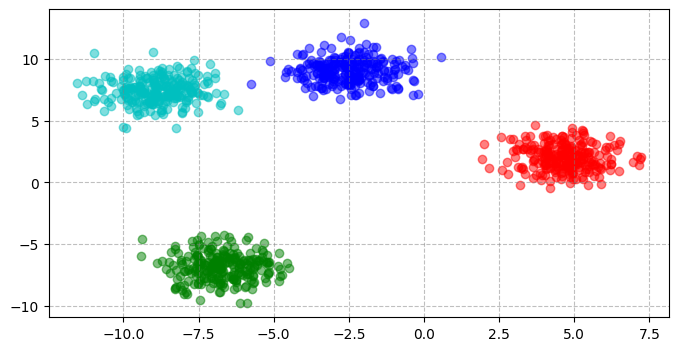

In [3]:
#features and target
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)
#calling cluster function
cluster(X, y)

#### Calculating the inertia for 1 to 10 clusters, and plotting  eblow graph whihc is the inertia as a function of the number of clusters.

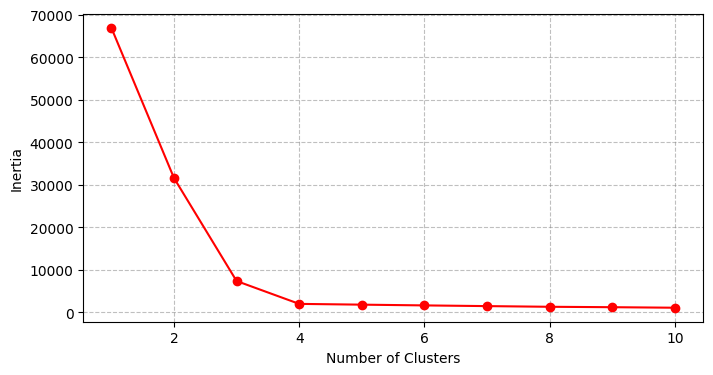

In [4]:
#empty list to store the inertia values for different numbers of clusters
inertia = []
#loop through a range of cluster numbers from 1 to 10
for num_clusters in range(1, 11):
    #KMeans instance with a specified number of clusters
    km = KMeans(n_clusters=num_clusters)
    #fit the KMeans model to the data
    km.fit(X)
    #inertia (sum of squared distances from each point to its centroid) of the current model to the list
    inertia.append(km.inertia_)
    
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

#### Clustering dataset into four group 

In [5]:
def clusterPlot(X, km=None):
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    if km:
        for i in range(km.n_clusters):
            plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], c=colors[i % len(colors)], alpha=0.5)
            plt.scatter(km.cluster_centers_[i, 0], km.cluster_centers_[i, 1], c=colors[i % len(colors)], marker='x', s=100)
    else:
        plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    plt.grid(True, ls='--', alpha=0.5, color='grey')
    plt.show()

In [6]:
angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
X_simple = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

In [7]:
km_simple = KMeans(n_clusters=4, random_state=10, n_init=1)
km_simple.fit(X_simple)

KMeans(n_clusters=4, n_init=1, random_state=10)

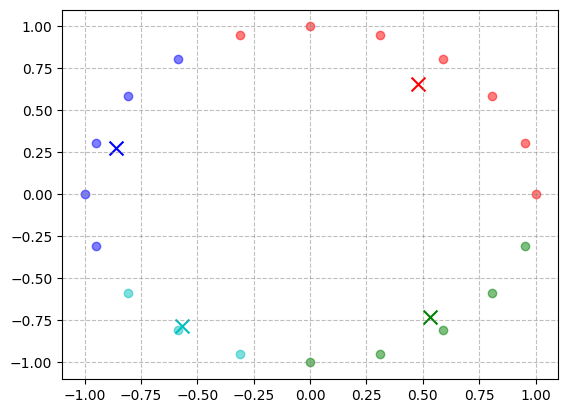

In [8]:
clusterPlot(X_simple, km_simple)

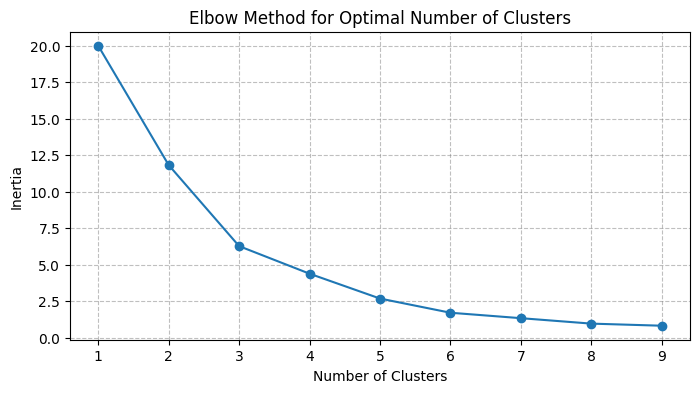

In [9]:
#inertia for different numbers of clusters
inertia = []
for num_clusters in range(1, 10):
    km = KMeans(n_clusters=num_clusters, random_state=10, n_init=1)
    km.fit(X_simple)
    inertia.append(km.inertia_)
    
#inertia values
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

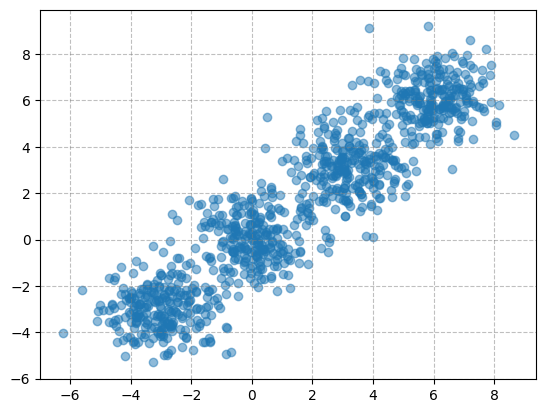

In [10]:
#creating freatures and target
n_samples = 1000
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0, centers=centers, shuffle=False, random_state=42)
clusterPlot(X)

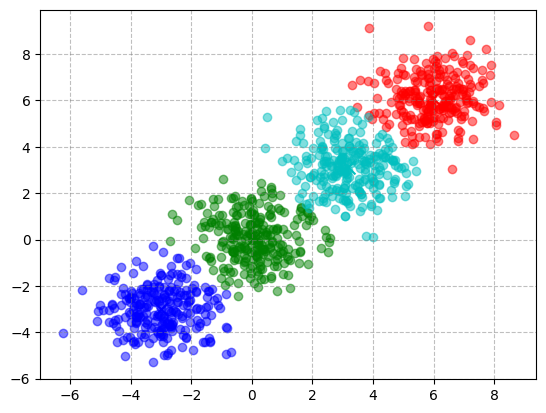

In [11]:
#clustering plot
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
clusterPlot(X, km)

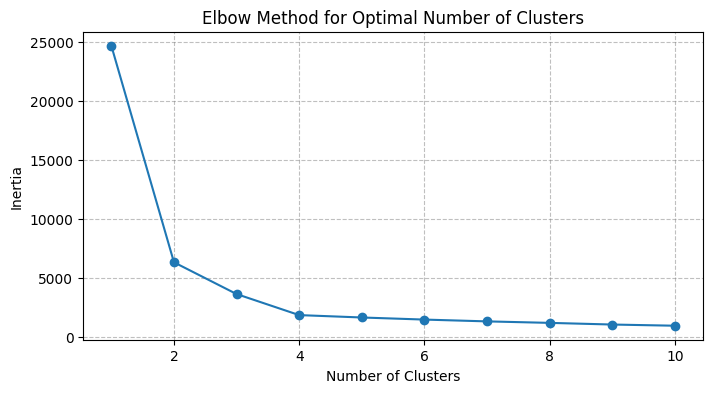

In [12]:
#elbow plot
inertia = []
for num_clusters in range(1, 11):
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

In [13]:
#resize image
def resize_image(img_path, base_width=300):
    img = Image.open(img_path)
    w_percent = (base_width / float(img.size[0]))
    h_size = int((float(img.size[1]) * float(w_percent)))
    img = img.resize((base_width, h_size), Image.Resampling.LANCZOS)
    return np.array(img)

In [14]:
#function for clustering image
def image_cluster(img, k):
    img_flat = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = np.array([kmeans.cluster_centers_[label] for label in kmeans.labels_]).astype('uint8')
    return img_flat2.reshape(img.shape)

In [15]:
#path of image
img_path = 'fruites.jpg'
img_small = resize_image(img_path)

In [16]:
img_small[:2]

array([[[187, 178, 178],
        [188, 180, 178],
        [185, 177, 175],
        ...,
        [111,  56,  40],
        [118,  66,  50],
        [131,  82,  65]],

       [[189, 180, 180],
        [187, 179, 177],
        [185, 177, 175],
        ...,
        [111,  57,  40],
        [117,  65,  49],
        [128,  79,  63]]], dtype=uint8)

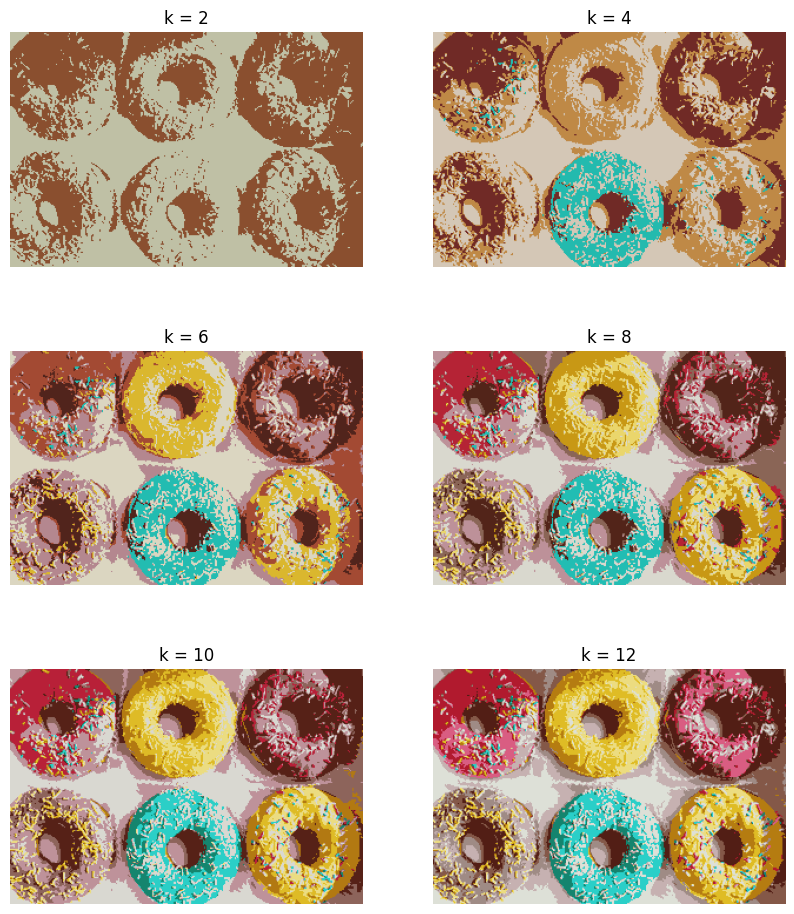

In [17]:
#values of k
k_vals = [2, 4, 6, 8, 10, 12]
#plotting cluster analysis
plt.figure(figsize=[10, 20])
for i, k in enumerate(k_vals, 1):
    plt.subplot(5, 2, i)
    clustered_img = image_cluster(img_small, k)
    plt.imshow(clustered_img)
    plt.title(f'k = {k}')
    plt.axis('off')
plt.show()